# Tensorflow Demo
 - 텐서플로 기초 실습
 > - https://github.com/hunkim/DeepLearningZeroToAll
  - https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/
  - https://r2rt.com/implementing-batch-normalization-in-tensorflow.html

In [1]:
import tensorflow as tf
tf.__version__
## '1.4.0'

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.4.0'

In [21]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")
num = tf.constant([[1,2,3],[4,5,6],[7,8,9]])

In [17]:
hello

<tf.Tensor 'Const_5:0' shape=() dtype=string>

In [18]:
# start a TF session
sess = tf.Session()

In [22]:
num

<tf.Tensor 'Const_8:0' shape=(3, 3) dtype=int32>

In [23]:
# run the op and get result
print(sess.run(hello))
print(sess.run(num))


## b'Hello, TensorFlow!'

b'Hello, TensorFlow!'
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [24]:
3 # a rank 0 tensor; this is a scalar with shape []
[1. ,2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

In [30]:
node1 = tf.constant(3.0, dtype=tf.float32, name='my_node1')
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

print("node1:", node1, "node2:", node2)
print("node3: ", node3)

## node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
## node3:  Tensor("Add:0", shape=(), dtype=float32)


node1: Tensor("my_node1:0", shape=(), dtype=float32) node2: Tensor("Const_11:0", shape=(), dtype=float32)
node3:  Tensor("Add_1:0", shape=(), dtype=float32)


In [26]:
sess = tf.Session()

In [27]:
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))

## sess.run(node1, node2):  [3.0, 4.0]
## sess.run(node3):  7.0

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


In [29]:
a

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float16>

In [46]:
a = tf.placeholder(dtype=tf.float16, name='my_node_a')
b = tf.placeholder(dtype=tf.float16, name='my_node_b')
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

In [42]:
[[1,2], [3,4]]

[[1, 2], [3, 4]]

In [43]:
sess.run(a, feed_dict={a:[[1,2], [3,4]]})

array([[1., 2.],
       [3., 4.]], dtype=float16)

In [45]:
print(sess.run(adder_node, feed_dict={a: [[1,2], [3,4]], b: [[1,2], [3,4]]}))
# print(sess.run(adder_node, feed_dict={a: [1,3], b: [2, 4]}))

## 7.5
## [ 3.  7.]

[[2. 4.]
 [6. 8.]]


In [47]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, feed_dict={a: 3, b:4.5}))
print(sess.run(add_and_triple, feed_dict={a: [3,2], b:[4,1]}))
# 22.5

22.5
[21.  9.]


In [55]:
# 명시적으로 여러개의 그래프 생성도 가능
g1 = tf.Graph()
with g1.as_default():
    c1 = tf.constant([2.,2.,2.])    
#     v1 = tf.Variable([1.0,2.0,3.0], name='g1/v1') # [0,0,0]
    v1_2 = tf.Variable(tf.random_normal(shape=[3]), name='g1/v1_2')    
    a1 = tf.add(c1, v1_2)

g2 = tf.Graph()
with g2.as_default():
    c2 = tf.constant([4.,4.,4.])    
    v2 = tf.Variable(tf.ones(3), name='g2/v2') # [1,1,1]
    v2_2 = tf.Variable(tf.fill([3,5], 7), name='g2/v2_2')
    a2 = tf.add(c2, v2)

In [50]:
g2

In [70]:
with tf.Session(graph = g1) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(v1_2))
    print(sess.run(a1))
#[2., 2., 2.]

# with tf.Session(graph = g2) as sess:
#     sess.run(tf.global_variables_initializer())
#     print(sess.run(a2))
# #[5,5,5]

[ 0.69057095  0.8349261  -1.2421254 ]
[2.6905708 2.8349261 0.7578746]


In [82]:
with g2.as_default():
    print(tf.global_variables())
    
with tf.Session(graph = g2) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(v2_2))
    print(v2.eval())

[<tf.Variable 'g2/v2:0' shape=(3,) dtype=float32_ref>, <tf.Variable 'g2/v2_2:0' shape=(3, 5) dtype=int32_ref>]
[[7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]]
[1. 1. 1.]


---
## Linear regression

In [ ]:
import numpy as np

In [127]:
xx = np.random.normal(5, 1, [100])
noise = np.random.normal(0, 0.5, [100])
yy = xx*3 + 10+ noise

In [128]:
yy

array([21.16175424, 29.40531334, 23.92764931, 26.3458976 , 28.28844972,
       24.12923355, 24.11054935, 18.9907661 , 25.92930969, 25.92845133,
       19.7797785 , 26.38017474, 27.07740284, 26.99567922, 24.96605095,
       25.06948727, 24.01851899, 22.95775164, 26.73391568, 25.38159547,
       26.88244267, 28.66969251, 28.63689029, 25.82670675, 20.76776264,
       26.55839613, 25.62435759, 27.67299017, 22.80851972, 25.12428576,
       19.73997035, 26.46080986, 24.6075402 , 22.05233148, 28.53564921,
       22.20008108, 23.96775348, 24.37827075, 19.61240388, 26.18937984,
       24.71632069, 29.15759273, 27.83460335, 28.43347452, 26.05383008,
       21.57651375, 29.11989651, 21.15129824, 20.19561981, 23.59264584,
       25.33226319, 32.20016757, 24.70531363, 29.31151868, 24.82737976,
       20.64119589, 31.46565033, 22.77115895, 29.00656953, 29.99122794,
       21.7403578 , 18.84614996, 32.1574654 , 29.73375659, 21.82142308,
       27.81273727, 29.08325398, 21.8705604 , 22.74678783, 27.34

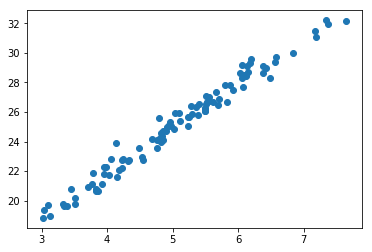

In [129]:
import matplotlib.pyplot as plt
# plt.scatter(x_train, y_train)
plt.scatter(xx, yy)
plt.show()

In [130]:
# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = xx * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - yy))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

---
위는 연습용

In [115]:
# X and Y data
x_train = np.array([1, 2, 3])
# y_train = [1, 2, 3]
y_train = np.array([5, 9, 13])# W*W 제곱해서 2차 근사

In [116]:
# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W*W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [131]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [132]:
costs = []
# Fit the line
for step in range(5001):
    sess.run(train)
    if step % 20 == 0:
        cost_ = sess.run(cost)
        costs.append(cost_)
        print(step, cost_, sess.run(W), sess.run(b))

0 168.40302 [2.1845036] [1.1368518]
20 3.0589108 [4.556737] [1.7260818]
40 2.967259 [4.531548] [1.8591346]
60 2.8785915 [4.506772] [1.9900029]
80 2.792813 [4.4824033] [2.118722]
100 2.7098289 [4.4584346] [2.2453277]
120 2.6295462 [4.4348593] [2.369854]
140 2.5518787 [4.4116716] [2.4923358]
160 2.4767406 [4.388864] [2.6128075]
180 2.4040508 [4.3664308] [2.7313006]
200 2.3337274 [4.3443666] [2.8478477]
220 2.265695 [4.322664] [2.9624815]
240 2.1998785 [4.301318] [3.0752325]
260 2.1362054 [4.280323] [3.1861322]
280 2.074606 [4.259672] [3.2952116]
300 2.015014 [4.239361] [3.402499]
320 1.9573619 [4.219383] [3.508025]
340 1.9015877 [4.199733] [3.6118183]
360 1.8476303 [4.180405] [3.7139075]
380 1.7954302 [4.161395] [3.8143203]
400 1.7449304 [4.1426973] [3.9130845]
420 1.696075 [4.1243067] [4.010227]
440 1.648811 [4.106218] [4.105774]
460 1.6030864 [4.088426] [4.199752]
480 1.5588516 [4.0709267] [4.2921863]
500 1.516057 [4.053714] [4.383104]
520 1.4746567 [4.0367846] [4.4725285]
540 1.434604

4480 0.24669094 [3.0609002] [9.62725]
4500 0.24663399 [3.0602727] [9.630565]
4520 0.24657892 [3.0596557] [9.633825]
4540 0.24652565 [3.0590484] [9.6370325]
4560 0.24647425 [3.058451] [9.640187]
4580 0.24642424 [3.0578635] [9.6432905]
4600 0.24637605 [3.057286] [9.646342]
4620 0.24632911 [3.0567174] [9.649344]
4640 0.24628423 [3.0561583] [9.652298]
4660 0.24624062 [3.0556087] [9.655201]
4680 0.24619831 [3.0550678] [9.658058]
4700 0.24615751 [3.054536] [9.660867]
4720 0.24611786 [3.0540128] [9.6636305]
4740 0.24607967 [3.053498] [9.666349]
4760 0.24604271 [3.052992] [9.669023]
4780 0.24600671 [3.0524943] [9.671652]
4800 0.2459721 [3.0520046] [9.674239]
4820 0.2459386 [3.051523] [9.676783]
4840 0.24590622 [3.0510492] [9.679284]
4860 0.2458748 [3.0505831] [9.681746]
4880 0.24584457 [3.050125] [9.684167]
4900 0.24581516 [3.049674] [9.686548]
4920 0.24578682 [3.0492308] [9.68889]
4940 0.2457593 [3.0487945] [9.691195]
4960 0.24573272 [3.0483656] [9.69346]
4980 0.24570702 [3.0479436] [9.695688

In [102]:
import numpy as np
k = np.array([1,2,3])
k*2*2 -3.33

array([0.67, 4.67, 8.67])

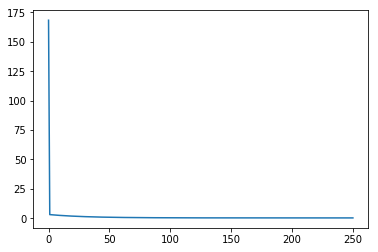

In [133]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.show()

---
## MLP(Multi Layer Perceptron)
> MNIST data set

In [134]:
# load MNIST dataset 
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [146]:
mnist.train.labels[1]
# [784] --> [24, 24]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

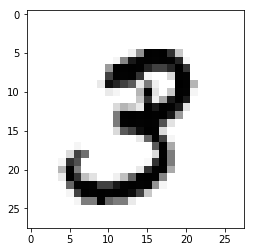

In [145]:
plt.imshow(mnist.train.images[1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [189]:
# parameters
learning_rate = 0.005
training_epochs = 30
# use mini batch
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784]) #[100, 784]
Y = tf.placeholder(tf.float32, [None, 10]) #[100, 10]

# # weights & bias for nn hidden layers
# # 1-hidden layer
# W1 = tf.Variable(tf.random_normal([784, 512])) #[784, 256]
# b1 = tf.Variable(tf.random_normal([512]))
# L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# W2 = tf.Variable(tf.random_normal([512, 10]))
# b2 = tf.Variable(tf.random_normal([10]))
# hypothesis = tf.matmul(L1, W2) + b2


# 2-hidden layers
# W1 = tf.Variable(tf.random_normal([784, 256]))
# b1 = tf.Variable(tf.random_normal([256]))
# L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# W2 = tf.Variable(tf.random_normal([256, 256]))
# b2 = tf.Variable(tf.random_normal([256]))
# L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

# W3 = tf.Variable(tf.random_normal([256, 10]))
# b3 = tf.Variable(tf.random_normal([10]))
# hypothesis = tf.matmul(L2, W3) + b3

# 3-hidden layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 256]))
b3 = tf.Variable(tf.random_normal([256]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.Variable(tf.random_normal([256, 10]))
b4 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L3, W4) + b4


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.argmax(hypothesis, 1)  # [0,0,0,1,0....]--> [3]
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

In [190]:
%%time
# initialize session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# for plotting
x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]

total_iter = int(mnist.train.num_examples/batch_size*training_epochs)
print('Total step:', total_iter)

for i in range(total_iter):
    batch = mnist.train.next_batch(batch_size)
    optimizer.run(feed_dict={X: batch[0], Y: batch[1]})

    if i % 200 == 0:   
        train_accuracy = accuracy.eval(feed_dict={X:mnist.train.images, Y:mnist.train.labels})
        val_accuracy = accuracy.eval(feed_dict={X: mnist.validation.images, Y: mnist.validation.labels})
        cost_ = cost.eval(feed_dict={X:mnist.test.images, Y:mnist.test.labels})
        print('step %d: acc_tr %g, acc_tt %g, cost %g' % (i, train_accuracy, val_accuracy, cost_))

        # for plotting
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_costs.append(cost_)
        x_range.append(i)

print('--------------------------')
print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Total step: 16500
step 0: acc_tr 0.0989818, acc_tt 0.0958, cost 354353
step 200: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 400: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 600: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 800: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 1000: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 1200: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 1400: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 1600: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 1800: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 2000: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 2200: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 2400: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 2600: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 2800: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 3000: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 3200: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 3400: acc_tr 0.0989818, acc_tt 0.0958, cost nan
step 3600: acc_tr 0.0989818, acc

In [ ]:
# draw graph
import matplotlib.pyplot as plt
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

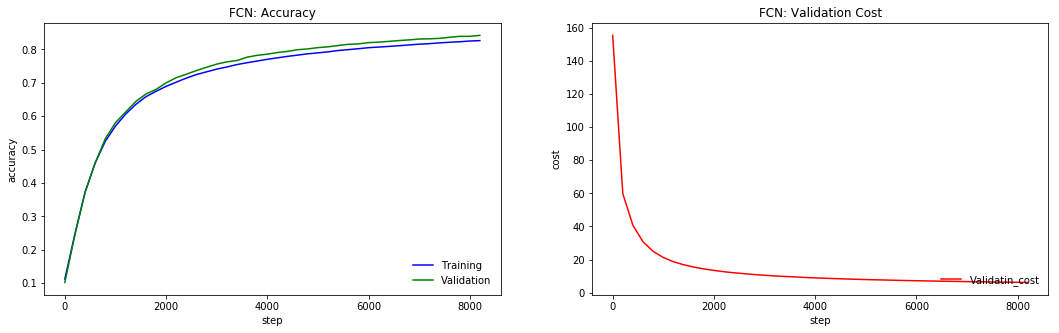

In [175]:
# plot learning result

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('FCN: Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('FCN: Validation Cost')
plt.show()